In [4]:
pip install wordcloud plotly seaborn

Note: you may need to restart the kernel to use updated packages.


In [94]:
#EDA 
#Import Libraries
import pandas as pd #reading
import numpy as np #transformation
import matplotlib.pyplot as plt #visual
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud
import scipy.stats as stats

In [96]:
data = pd.read_csv('Casino_Gaming_Data new.csv')
data.head(10)

,Fiscal Year,Month Ending,Licensee,Wagers,Patron Winnings,Cancelled Wagers,Online Casino Gaming Win/(Loss),Promotional Coupons or Credits Wagered (3),Promotional Deduction (4),Total Gross Gaming Revenue,Payment (5)
0,2021/22,06/30/2022 12:00:00 AM,Mohegan Tribe On-Reservation,379023,335505,5,43513,6390,6390,37123,6682
1,2021/22,06/30/2022 12:00:00 AM,MPTN On-Reservation,671843,685886,3,-14046,29041,0,-14046,0
2,2021/22,06/30/2022 12:00:00 AM,"MPI Master Wagering License CT, LLC",420056291,406814933,164727,13076631,12372142,3269158,9807473,1765345
3,2021/22,06/30/2022 12:00:00 AM,"Mohegan Digital, LLC",254393582,246515856,11645,7866081,1397441,1397441,6468640,1164355
4,2021/22,05/31/2022 12:00:00 AM,Mohegan Tribe On-Reservation,716607,681306,0,35301,4130,4130,31171,5611
5,2021/22,05/31/2022 12:00:00 AM,MPTN On-Reservation,710829,684549,10,26270,22614,6568,19703,3546
6,2021/22,05/31/2022 12:00:00 AM,"MPI Master Wagering License CT, LLC",496904669,484267401,146970,12490298,29968316,3122574,9367723,1686190
7,2021/22,05/31/2022 12:00:00 AM,"Mohegan Digital, LLC",275818534,267451923,3887,8362724,1205520,1205520,7157204,1288297
8,2021/22,04/30/2022 12:00:00 AM,MPTN On-Reservation,1464737,1438677,0,26060,48032,6515,19545,3518
9,2021/22,04/30/2022 12:00:00 AM,"MPI Master Wagering License CT, LLC",475988357,462730802,210022,13047534,17431335,3261883,9785650,1761417


In [98]:
data.shape

(143, 11)

In [168]:
data.columns

Index(['Fiscal Year', 'Month Ending', 'Licensee', 'Wagers', 'Patron Winnings',
       'Cancelled Wagers', 'Online Casino Gaming Win/(Loss)',
       'Promotional Coupons or Credits Wagered (3)',
       'Promotional Deduction (4)', 'Total Gross Gaming Revenue',
       'Payment (5)', 'Log Total Gross Gaming Revenue', 'Month', 'Year'],
      dtype='object')

In [100]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 11 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   Fiscal Year                                 143 non-null    object
 1   Month Ending                                143 non-null    object
 2   Licensee                                    143 non-null    object
 3   Wagers                                      143 non-null    int64 
 4   Patron Winnings                             143 non-null    int64 
 5   Cancelled Wagers                            143 non-null    int64 
 6   Online Casino Gaming Win/(Loss)             143 non-null    int64 
 7   Promotional Coupons or Credits Wagered (3)  143 non-null    int64 
 8   Promotional Deduction (4)                   143 non-null    int64 
 9   Total Gross Gaming Revenue                  143 non-null    int64 
 10  Payment (5)               

In [102]:
# Check for missing values
data.isnull().sum()

Fiscal Year                                   0
Month Ending                                  0
Licensee                                      0
Wagers                                        0
Patron Winnings                               0
Cancelled Wagers                              0
Online Casino Gaming Win/(Loss)               0
Promotional Coupons or Credits Wagered (3)    0
Promotional Deduction (4)                     0
Total Gross Gaming Revenue                    0
Payment (5)                                   0
dtype: int64

In [104]:
duplicates = data.duplicated().sum()
print(f"\nNumber of Duplicates: {duplicates}")


Number of Duplicates: 0


In [106]:
data.describe()

,Wagers,Patron Winnings,Cancelled Wagers,Online Casino Gaming Win/(Loss),Promotional Coupons or Credits Wagered (3),Promotional Deduction (4),Total Gross Gaming Revenue,Payment (5)
count,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02
mean,2.742207e+08,2.655218e+08,1.783408e+05,8.520509e+06,2.909760e+06,1.470359e+06,7.050150e+06,1.269229e+06
std,2.815530e+08,2.725166e+08,2.826004e+05,8.921912e+06,5.194974e+06,1.512958e+06,7.483596e+06,1.346855e+06
min,1.145280e+05,1.113650e+05,0.000000e+00,-8.099000e+04,0.000000e+00,0.000000e+00,-8.099000e+04,0.000000e+00
25%,1.407190e+06,1.357855e+06,5.000000e+00,3.713950e+04,1.118100e+04,6.188500e+03,3.172700e+04,5.711000e+03
50%,2.656540e+08,2.575127e+08,3.887000e+03,7.866081e+06,1.065100e+06,1.021521e+06,6.821088e+06,1.227796e+06
75%,5.352846e+08,5.156584e+08,2.913700e+05,1.587461e+07,3.844558e+06,3.071548e+06,1.304302e+07,2.347743e+06
max,7.838842e+08,7.573176e+08,1.133136e+06,2.570443e+07,3.220656e+07,4.163625e+06,2.281557e+07,4.106803e+06


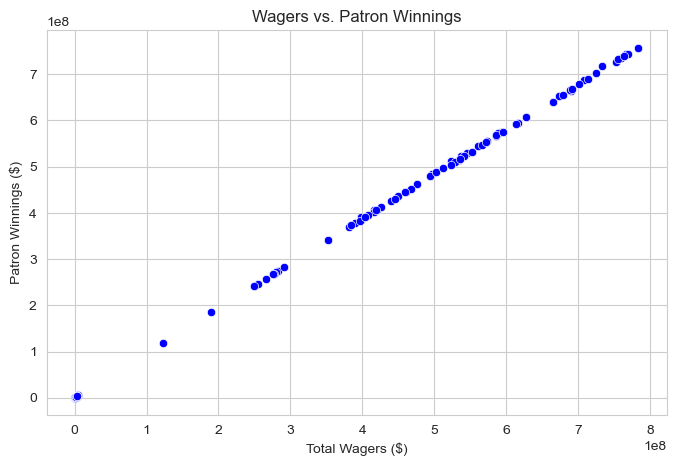

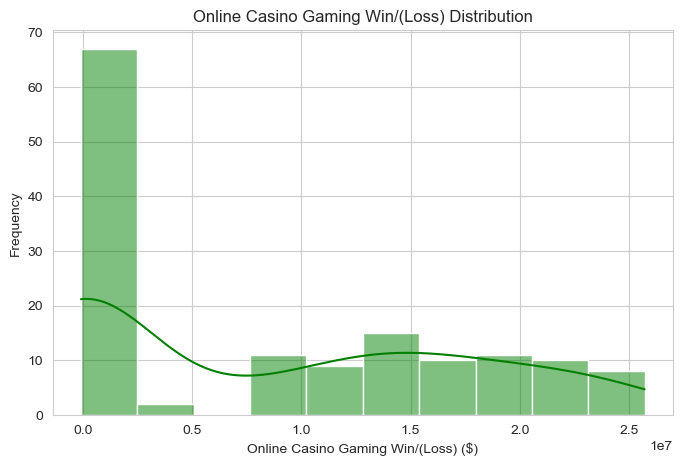

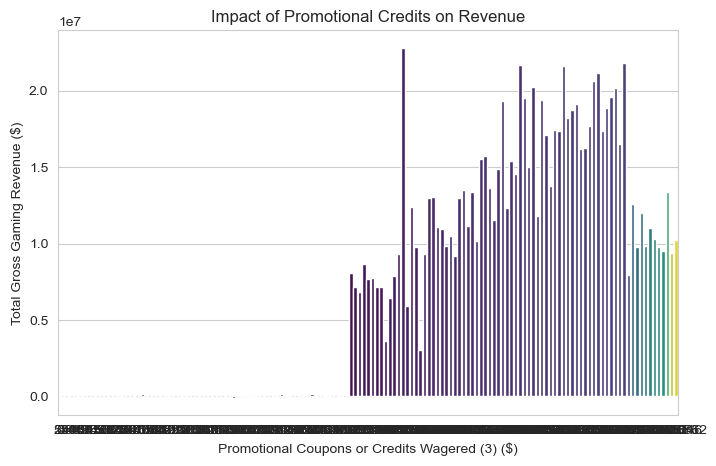

In [20]:


# Convert to DataFrame
df = pd.DataFrame(data)

# Set a theme for Seaborn
sns.set_style("whitegrid")

# Plot Wagers vs. Patron Winnings (Shows the relationship between total bets and winnings to analyze if there's a trend.)
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["Wagers"], y=df["Patron Winnings"], color="blue")
plt.xlabel("Total Wagers ($)")
plt.ylabel("Patron Winnings ($)")
plt.title("Wagers vs. Patron Winnings")
plt.show()

# Histogram of Casino Win/Loss (Displays how frequently the casino wins or loses money and how much variance exists.)
plt.figure(figsize=(8, 5))
sns.histplot(df["Online Casino Gaming Win/(Loss)"], bins=10, kde=True, color="green")
plt.xlabel("Online Casino Gaming Win/(Loss) ($)")
plt.ylabel("Frequency")
plt.title("Online Casino Gaming Win/(Loss) Distribution")
plt.show()

# Bar Plot of Promotional Credits vs. Gross Gaming Revenue (Analyzes whether higher promotions lead to higher or lower revenue.)
plt.figure(figsize=(8, 5))
sns.barplot(x=df["Promotional Coupons or Credits Wagered (3)"], y=df["Total Gross Gaming Revenue"], hue = df["Promotional Coupons or Credits Wagered (3)"], palette="viridis", legend=False)
plt.xlabel("Promotional Coupons or Credits Wagered (3) ($)")
plt.ylabel("Total Gross Gaming Revenue ($)")
plt.title("Impact of Promotional Credits on Revenue")
plt.show()

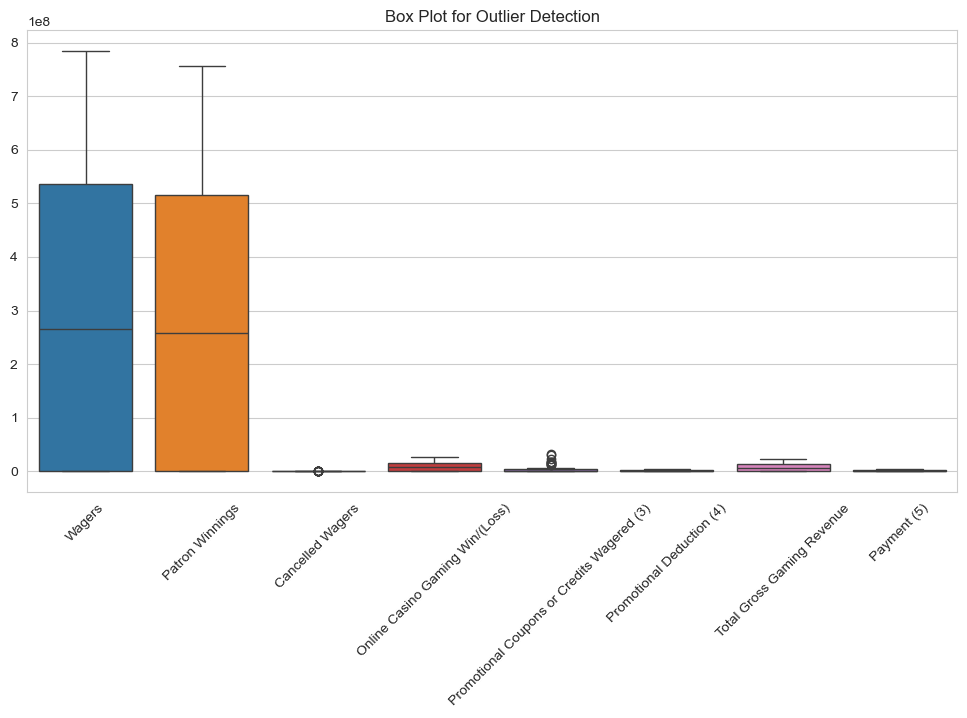

In [22]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.select_dtypes(include=[np.number]))
plt.title("Box Plot for Outlier Detection")
plt.xticks(rotation=45)
plt.show()

In [108]:
num = [ 'Wagers', 'Patron Winnings',
       'Cancelled Wagers', 'Online Casino Gaming Win/(Loss)',
       'Promotional Coupons or Credits Wagered (3)',
       'Promotional Deduction (4)', 'Total Gross Gaming Revenue',
       'Payment (5)'] 
ds = pd.DataFrame({
      'Mean': data[num].mean(),
      'Median': data[num].median(),
      'Mode': data[num].mode().iloc[0],
      'Variance': data[num].var(),
      'Standard Deviation': data[num].std(),
      'Skewness': data[num].skew(),
      'Kurtosis': data[num].kurt()
})
print(ds)

                                                    Mean       Median  \
Wagers                                      2.742207e+08  265653958.0   
Patron Winnings                             2.655218e+08  257512736.0   
Cancelled Wagers                            1.783408e+05       3887.0   
Online Casino Gaming Win/(Loss)             8.520509e+06    7866081.0   
Promotional Coupons or Credits Wagered (3)  2.909760e+06    1065100.0   
Promotional Deduction (4)                   1.470359e+06    1021521.0   
Total Gross Gaming Revenue                  7.050150e+06    6821088.0   
Payment (5)                                 1.269229e+06    1227796.0   

                                                Mode      Variance  \
Wagers                                      114528.0  7.927211e+16   
Patron Winnings                             111365.0  7.426529e+16   
Cancelled Wagers                                 0.0  7.986297e+10   
Online Casino Gaming Win/(Loss)             -80990.0  7.960051

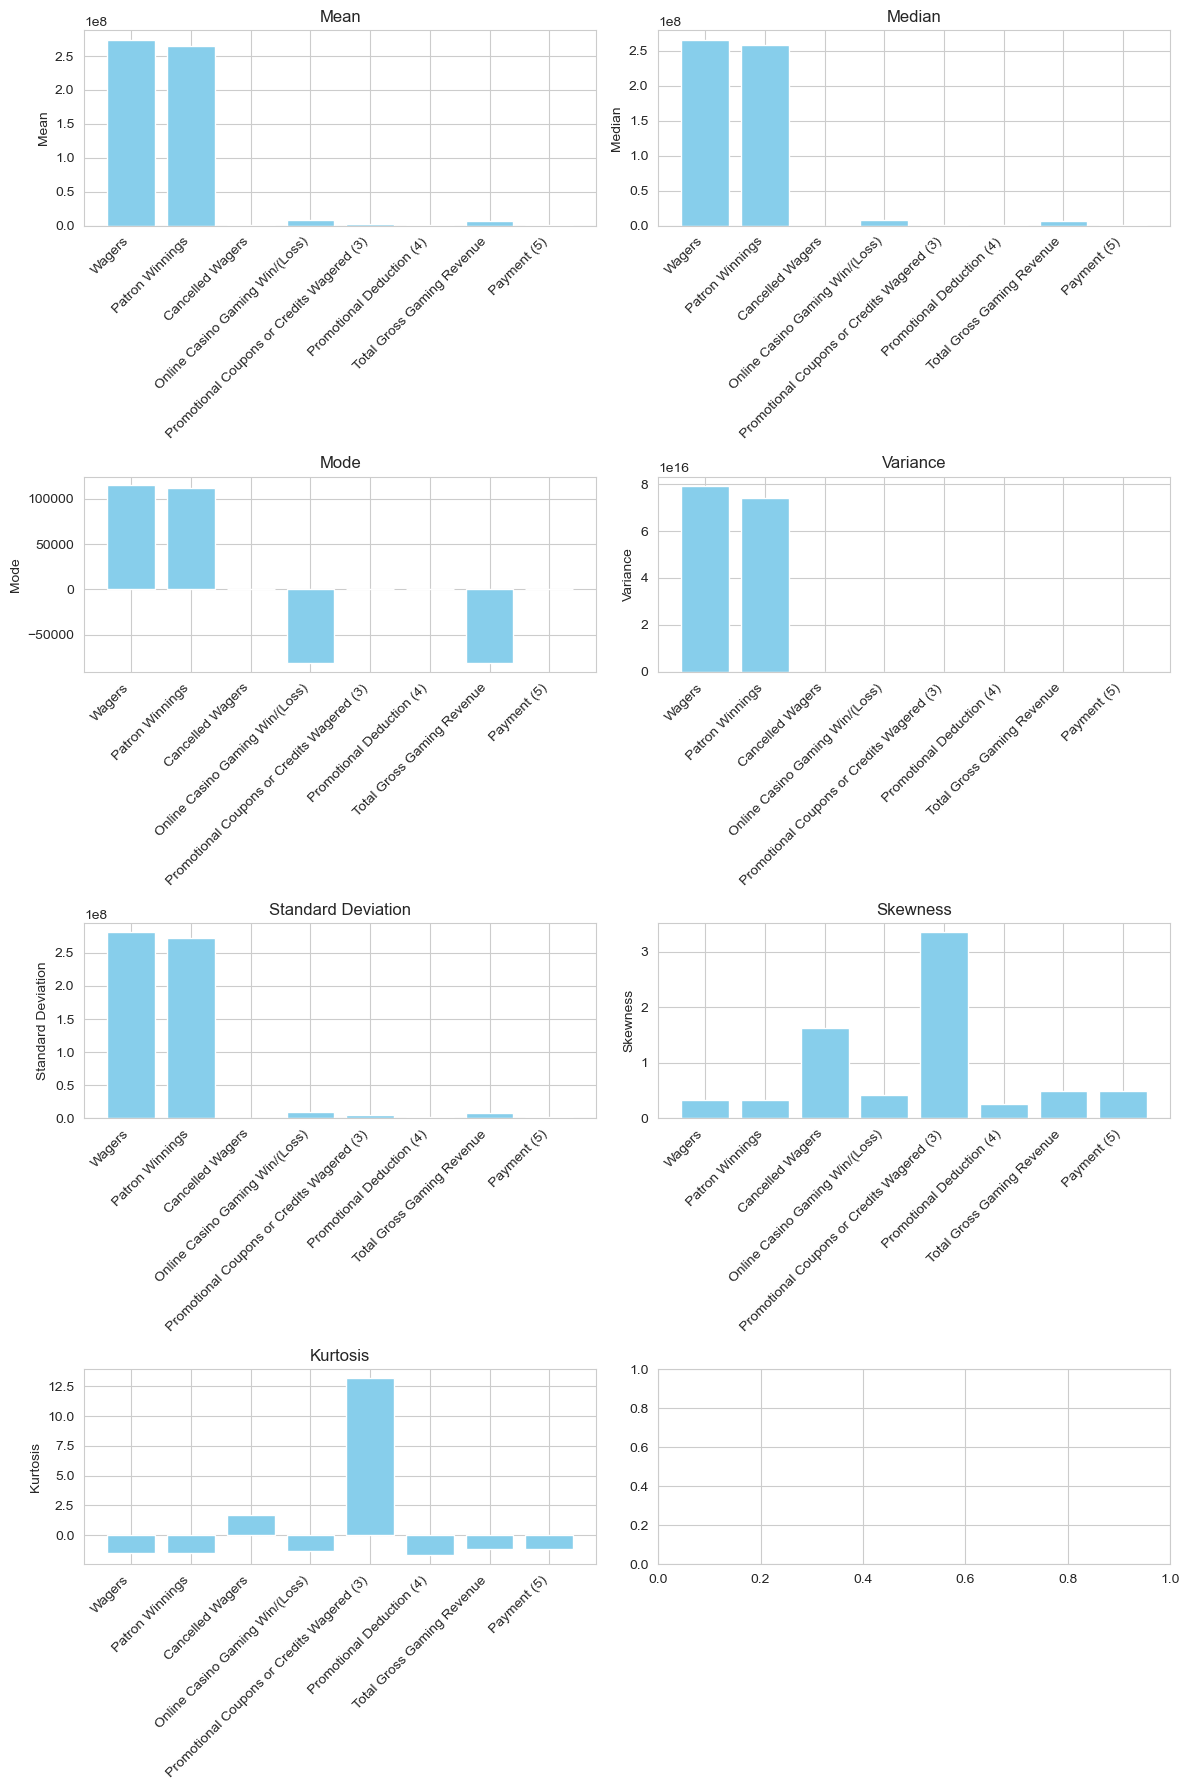

In [199]:
# Plot the data
fig, axes = plt.subplots(4, 2, figsize=(12, 18))

# List of the columns to plot
columns = ["Mean", "Median", "Mode", "Variance", "Standard Deviation", "Skewness", "Kurtosis"]

# Generate bar plots for each column
for i, column in enumerate(columns):
    ax = axes[i // 2, i % 2]
    ax.bar(df["Category"], df[column], color='skyblue')
    ax.set_title(f'{column}')
    ax.set_ylabel(column)
    
    # Explicitly set tick positions and labels
    ax.set_xticks(range(len(df["Category"])))
    ax.set_xticklabels(df["Category"], rotation=45, ha="right")

# Adjust layout
plt.tight_layout()
plt.show()


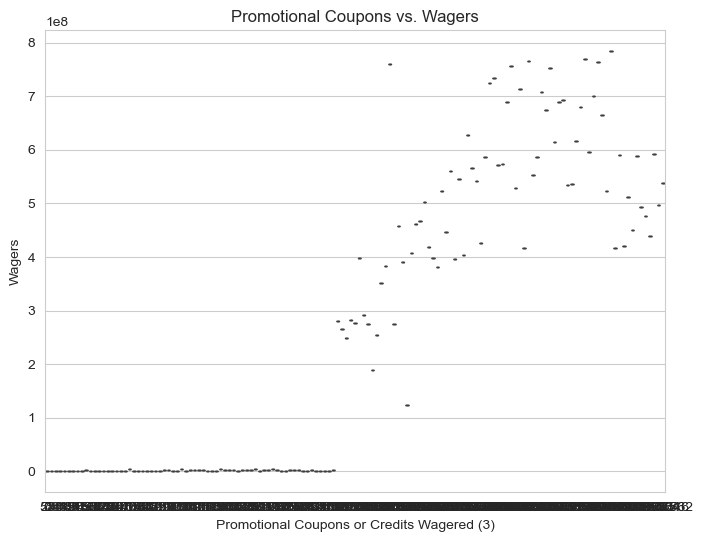

In [114]:
;;
'''''''''plt.figure(figsize=(8, 6))
sns.boxplot(x="Promotional Coupons or Credits Wagered (3)", y="Wagers", data=data)
plt.title("Promotional Coupons vs. Wagers")
plt.show()

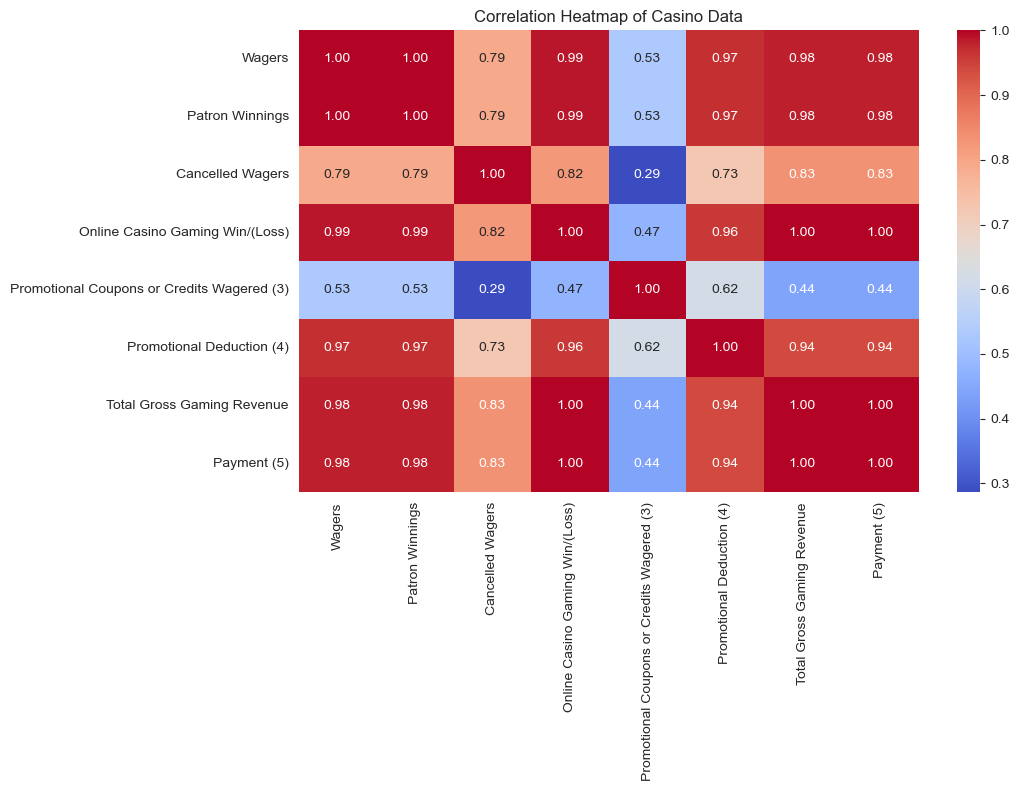

In [36]:
plt.figure(figsize=(10, 6))
corr = data.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Casino Data")
plt.show()

In [38]:
print(data.groupby("Licensee")["Online Casino Gaming Win/(Loss)"].sum())

Licensee
MPI Master Wagering License CT, LLC    686123473
MPTN On-Reservation                      1692339
Mohegan Digital, LLC                   529507606
Mohegan Tribe On-Reservation             1109387
Name: Online Casino Gaming Win/(Loss), dtype: int64


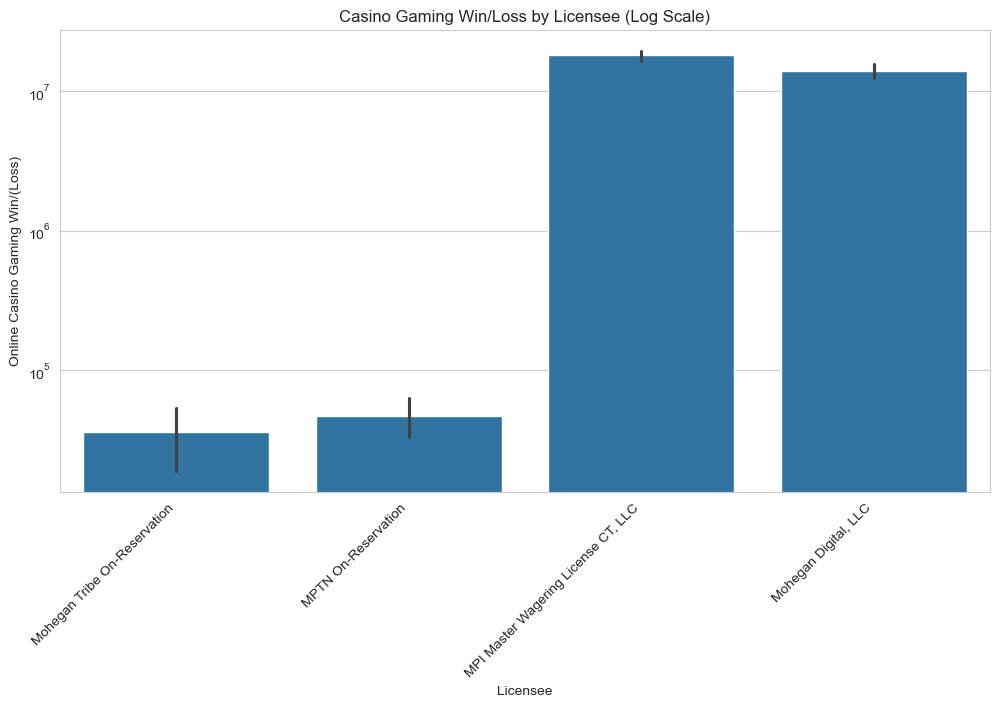

In [40]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(x="Licensee", y="Online Casino Gaming Win/(Loss)", data=data)
plt.yscale("log")  # Apply log scale
plt.xticks(rotation=45, ha="right")  # Better readability
plt.title("Casino Gaming Win/Loss by Licensee (Log Scale)")
plt.show()

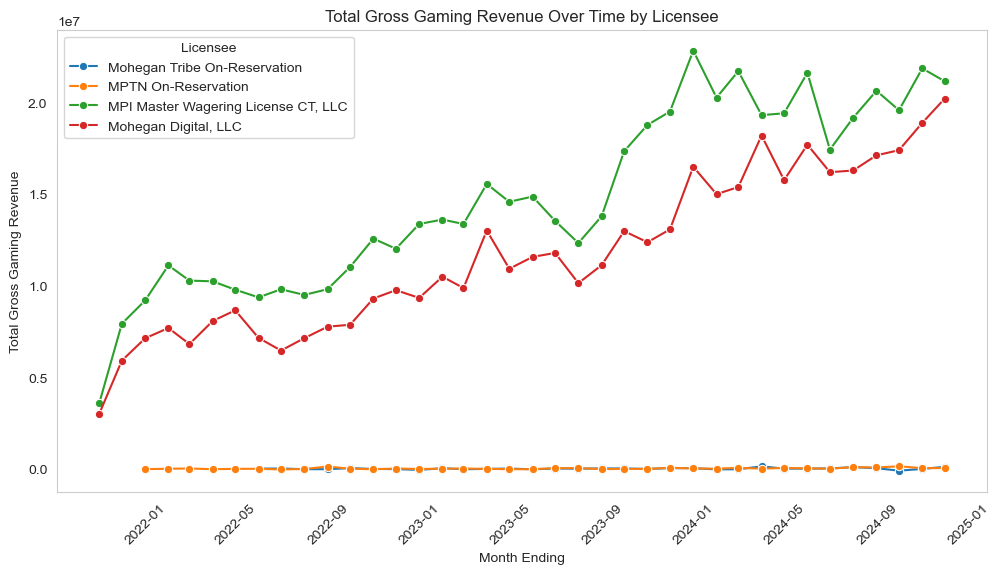

In [120]:
# Ensure column names are properly formatted
data.columns = data.columns.str.strip()

# Check if 'Month Ending' exists in the dataset
if "Month Ending" not in data.columns:
    print("Error: 'Month Ending' column not found!")
    print("Available columns:", list(data.columns))
else:
    # Convert 'Month Ending' to datetime format
    data["Month Ending"] = pd.to_datetime(data["Month Ending"], format="%m/%d/%Y %I:%M %p", errors="coerce")

    # Check for NaT values after conversion
    if data["Month Ending"].isna().sum() > 0:
        print("Warning: Some dates could not be converted!")

    # Plot the total gross gaming revenue over time by licensee
    plt.figure(figsize=(12, 6))
    sns.lineplot(x="Month Ending", y="Total Gross Gaming Revenue", hue="Licensee", data=data, marker="o")

    # Format plot
    plt.xticks(rotation=45)
    plt.title("Total Gross Gaming Revenue Over Time by Licensee")
    plt.xlabel("Month Ending")
    plt.ylabel("Total Gross Gaming Revenue")
    plt.legend(title="Licensee")
    plt.grid()

    # Show the plot
    plt.show()

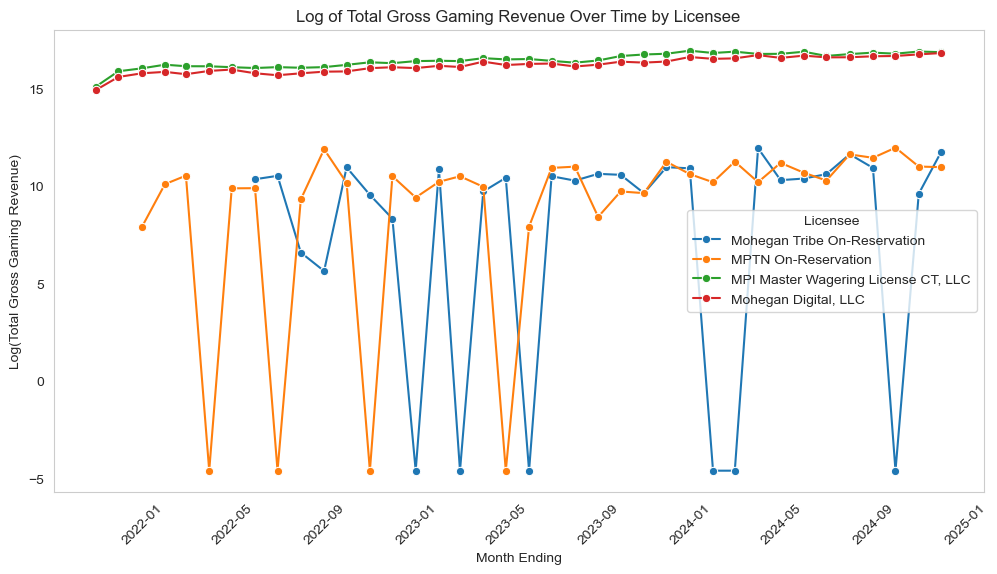

In [130]:


# Ensure column names are properly formatted
data.columns = data.columns.str.strip()

# Check if 'Month Ending' exists in the dataset
if "Month Ending" not in data.columns:
    print("Error: 'Month Ending' column not found!")
    print("Available columns:", list(data.columns))
else:
    # Convert 'Month Ending' to datetime format
    data["Month Ending"] = pd.to_datetime(data["Month Ending"], format="%m/%d/%Y %I:%M %p", errors="coerce")

    # Check for NaT values after conversion
    if data["Month Ending"].isna().sum() > 0:
        print("Warning: Some dates could not be converted!")

    # Handle small values for log transformation (to avoid issues with log(0))
    small_value = 0.01
    data["Total Gross Gaming Revenue"] = data["Total Gross Gaming Revenue"].apply(lambda x: x if x > small_value else small_value)

    # Apply log transformation to Total Gross Gaming Revenue
    data["Log Total Gross Gaming Revenue"] = np.log(data["Total Gross Gaming Revenue"])

    # Plot the log-transformed total gross gaming revenue over time by licensee
    plt.figure(figsize=(12, 6))
    sns.lineplot(x="Month Ending", y="Log Total Gross Gaming Revenue", hue="Licensee", data=data, marker="o")

    # Format plot
    plt.xticks(rotation=45)
    plt.title("Log of Total Gross Gaming Revenue Over Time by Licensee")
    plt.xlabel("Month Ending")
    plt.ylabel("Log(Total Gross Gaming Revenue)")
    plt.legend(title="Licensee")
    plt.grid()

    # Show the plot
    plt.show()


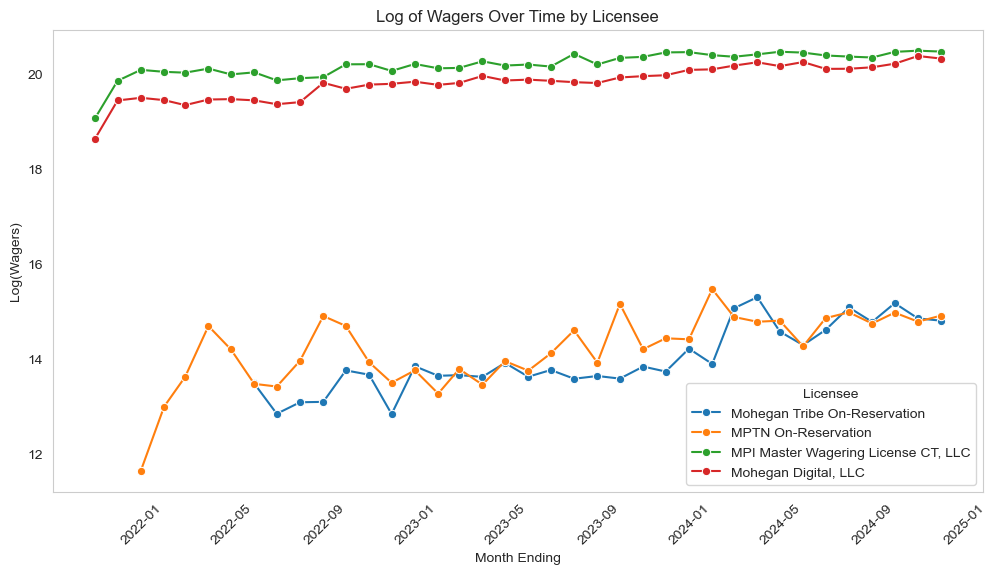

In [190]:


# Ensure column names are properly formatted
data.columns = data.columns.str.strip()

# Check if 'Month Ending' exists in the dataset
if "Month Ending" not in data.columns:
    print("Error: 'Month Ending' column not found!")
    print("Available columns:", list(data.columns))
else:
    # Convert 'Month Ending' to datetime format
    data["Month Ending"] = pd.to_datetime(data["Month Ending"], format="%m/%d/%Y %I:%M %p", errors="coerce")

    # Check for NaT values after conversion
    if data["Month Ending"].isna().sum() > 0:
        print("Warning: Some dates could not be converted!")

    # Handle small values for log transformation (to avoid issues with log(0))
    small_value = 0.01
    data["Wagers"] = data["Wagers"].apply(lambda x: x if x > small_value else small_value)

    # Apply log transformation to Total Gross Gaming Revenue
    data["Log Wagers"] = np.log(data["Wagers"])

    # Plot the log-transformed total gross gaming revenue over time by licensee
    plt.figure(figsize=(12, 6))
    sns.lineplot(x="Month Ending", y="Log Wagers", hue="Licensee", data=data, marker="o")

    # Format plot
    plt.xticks(rotation=45)
    plt.title("Log of Wagers Over Time by Licensee")
    plt.xlabel("Month Ending")
    plt.ylabel("Log(Wagers)")
    plt.legend(title="Licensee")
    plt.grid()

    # Show the plot
    plt.show()


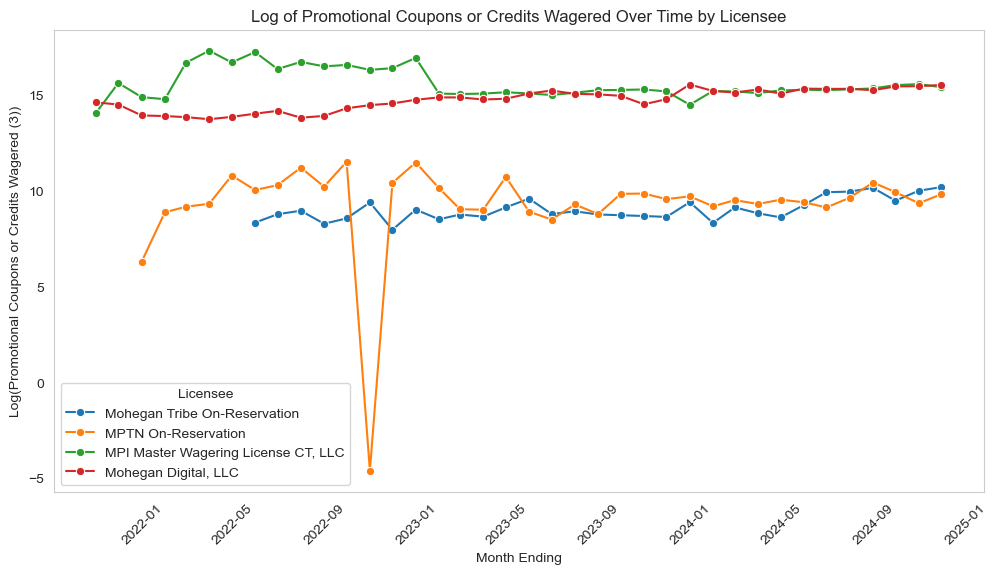

In [192]:


# Ensure column names are properly formatted
data.columns = data.columns.str.strip()

# Check if 'Month Ending' exists in the dataset
if "Month Ending" not in data.columns:
    print("Error: 'Month Ending' column not found!")
    print("Available columns:", list(data.columns))
else:
    # Convert 'Month Ending' to datetime format
    data["Month Ending"] = pd.to_datetime(data["Month Ending"], format="%m/%d/%Y %I:%M %p", errors="coerce")

    # Check for NaT values after conversion
    if data["Month Ending"].isna().sum() > 0:
        print("Warning: Some dates could not be converted!")

    # Handle small values for log transformation (to avoid issues with log(0))
    small_value = 0.01
    data["Promotional Coupons or Credits Wagered (3)"] = data["Promotional Coupons or Credits Wagered (3)"].apply(lambda x: x if x > small_value else small_value)

    # Apply log transformation to Total Gross Gaming Revenue
    data["Log Promotional Coupons or Credits Wagered (3)"] = np.log(data["Promotional Coupons or Credits Wagered (3)"])

    # Plot the log-transformed total gross gaming revenue over time by licensee
    plt.figure(figsize=(12, 6))
    sns.lineplot(x="Month Ending", y="Log Promotional Coupons or Credits Wagered (3)", hue="Licensee", data=data, marker="o")

    # Format plot
    plt.xticks(rotation=45)
    plt.title("Log of Promotional Coupons or Credits Wagered Over Time by Licensee")
    plt.xlabel("Month Ending")
    plt.ylabel("Log(Promotional Coupons or Credits Wagered (3))")
    plt.legend(title="Licensee")
    plt.grid()

    # Show the plot
    plt.show()


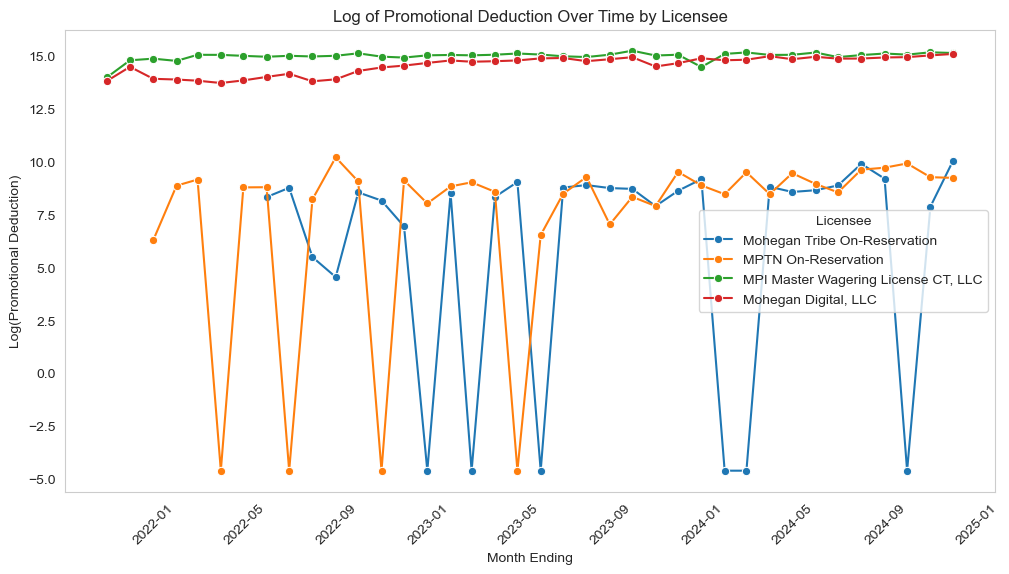

In [194]:


# Ensure column names are properly formatted
data.columns = data.columns.str.strip()

# Check if 'Month Ending' exists in the dataset
if "Month Ending" not in data.columns:
    print("Error: 'Month Ending' column not found!")
    print("Available columns:", list(data.columns))
else:
    # Convert 'Month Ending' to datetime format
    data["Month Ending"] = pd.to_datetime(data["Month Ending"], format="%m/%d/%Y %I:%M %p", errors="coerce")

    # Check for NaT values after conversion
    if data["Month Ending"].isna().sum() > 0:
        print("Warning: Some dates could not be converted!")

    # Handle small values for log transformation (to avoid issues with log(0))
    small_value = 0.01
    data["Promotional Deduction (4)"] = data["Promotional Deduction (4)"].apply(lambda x: x if x > small_value else small_value)

    # Apply log transformation to Total Gross Gaming Revenue
    data["Log Promotional Deduction (4)"] = np.log(data["Promotional Deduction (4)"])

    # Plot the log-transformed total gross gaming revenue over time by licensee
    plt.figure(figsize=(12, 6))
    sns.lineplot(x="Month Ending", y="Log Promotional Deduction (4)", hue="Licensee", data=data, marker="o")

    # Format plot
    plt.xticks(rotation=45)
    plt.title("Log of Promotional Deduction Over Time by Licensee")
    plt.xlabel("Month Ending")
    plt.ylabel("Log(Promotional Deduction)")
    plt.legend(title="Licensee")
    plt.grid()

    # Show the plot
    plt.show()


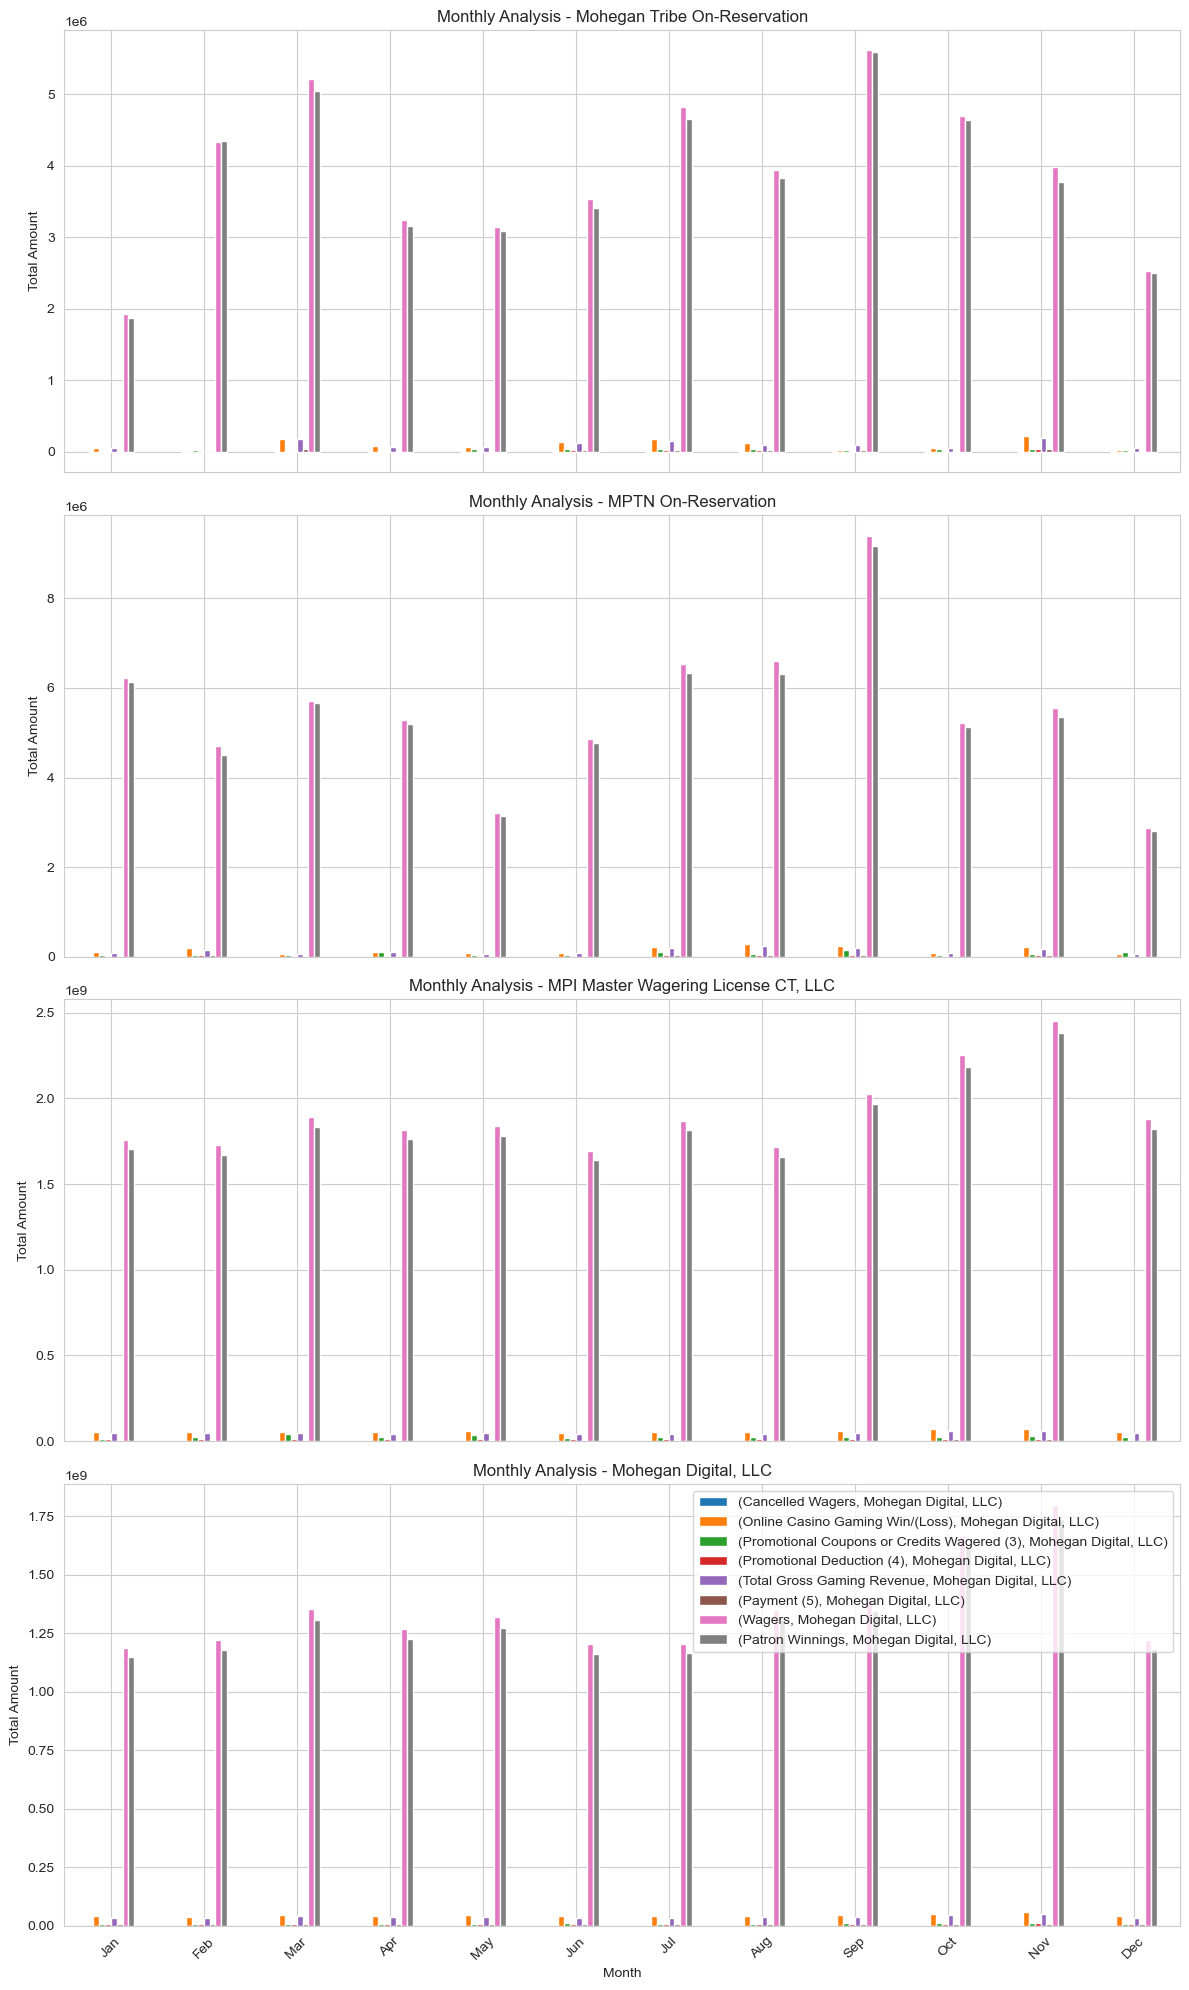

In [184]:


# Comprehensive Monthly Analysis by Licensee
monthly_licensee_analysis = data.groupby(['Month', 'Licensee'])[['Cancelled Wagers',
    'Online Casino Gaming Win/(Loss)', 'Promotional Coupons or Credits Wagered (3)',
    'Promotional Deduction (4)', 'Total Gross Gaming Revenue', 'Payment (5)', 'Wagers', 'Patron Winnings']].sum()

# Plotting each licensee’s performance by month
fig, axes = plt.subplots(4, 1, figsize=(12, 20), sharex=True)
licensees = data['Licensee'].unique()

for ax, licensee in zip(axes, licensees):
    monthly_licensee_analysis.loc[pd.IndexSlice[:, licensee], :].unstack(level=1).plot(kind='bar', ax=ax, legend=False)
    ax.set_title(f"Monthly Analysis - {licensee}")
    ax.set_ylabel("Total Amount")

plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()




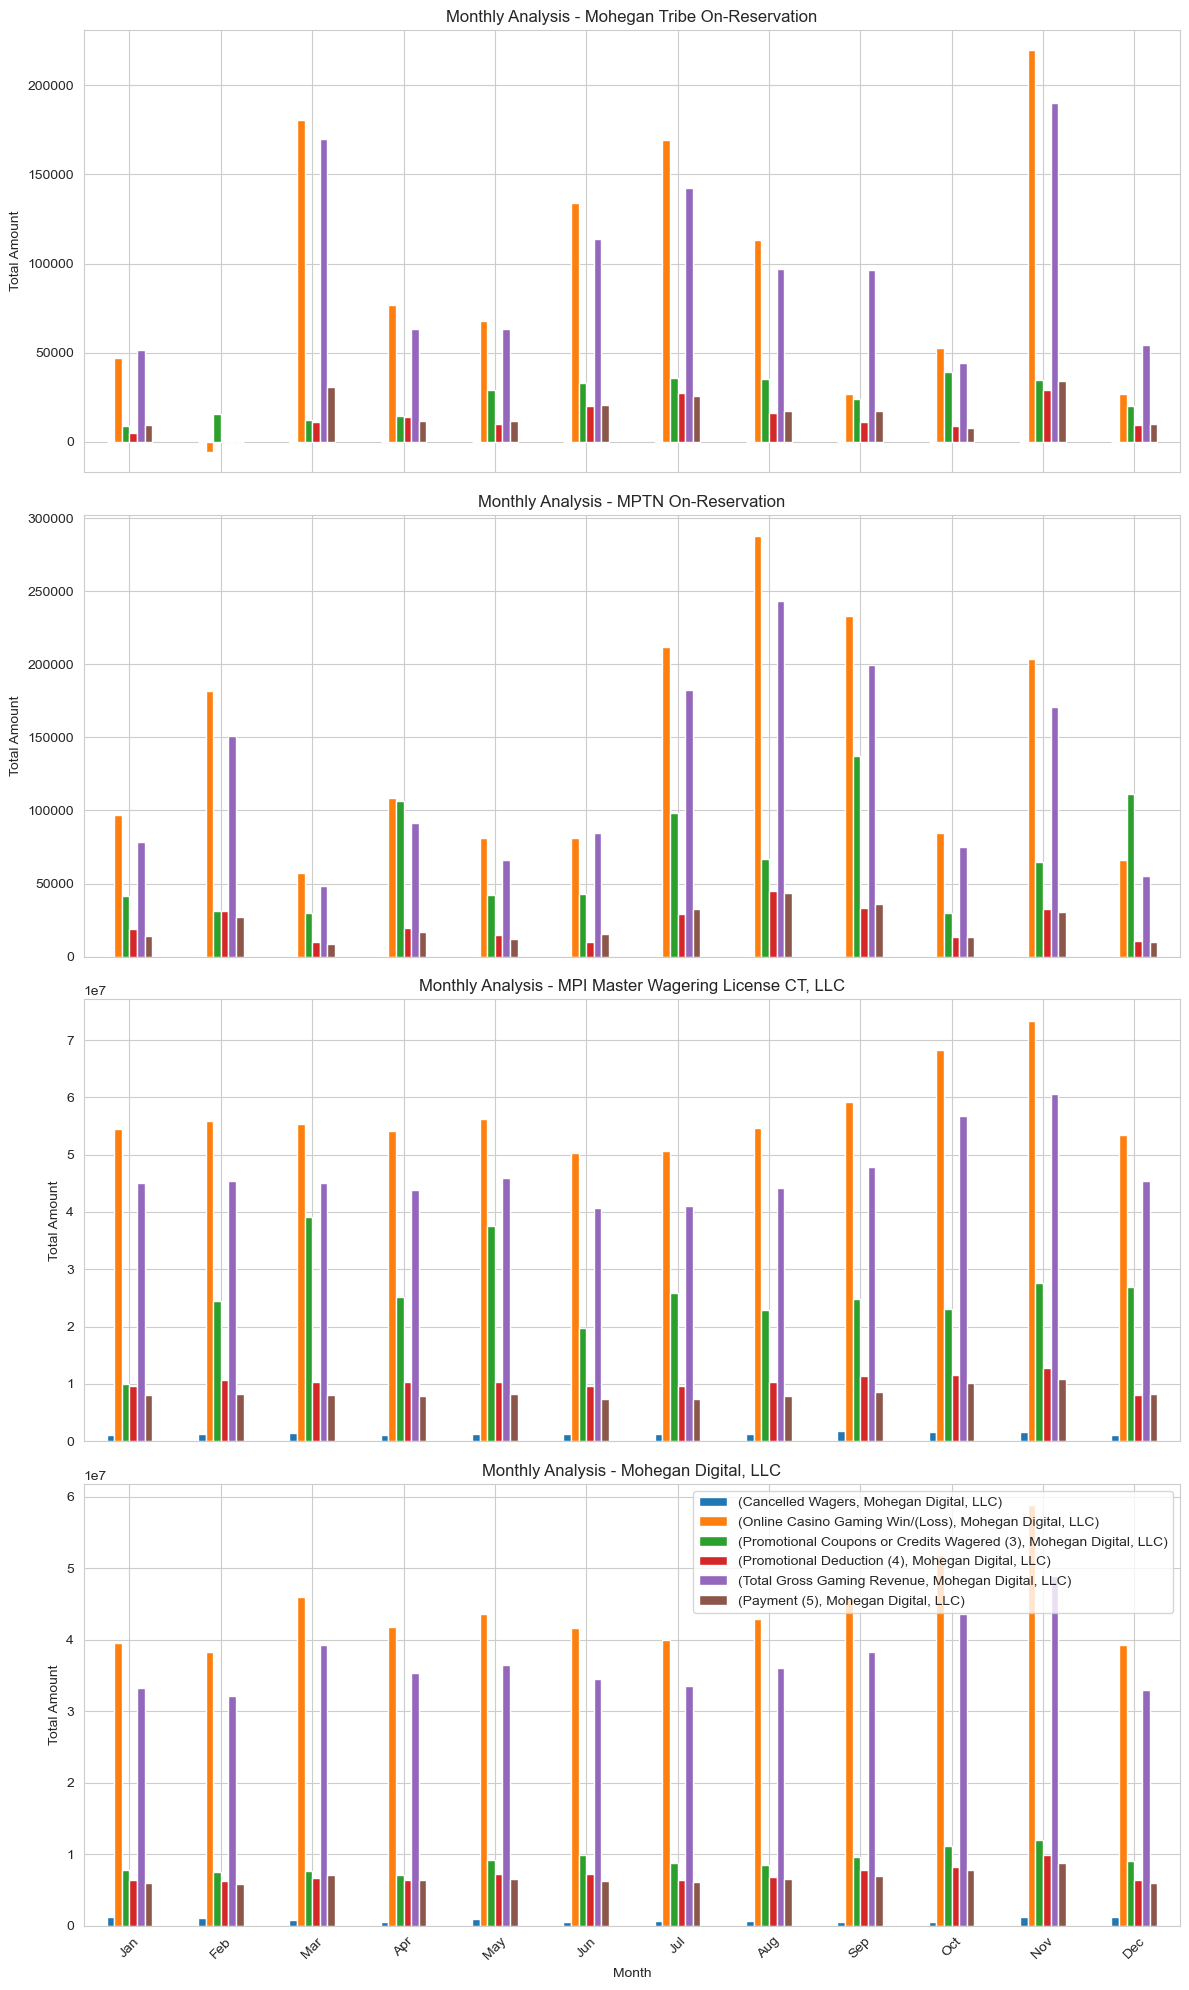

In [205]:
# Comprehensive Monthly Analysis by Licensee
monthly_licensee_analysis = data.groupby(['Month', 'Licensee'])[['Cancelled Wagers',
    'Online Casino Gaming Win/(Loss)', 'Promotional Coupons or Credits Wagered (3)',
    'Promotional Deduction (4)', 'Total Gross Gaming Revenue', 'Payment (5)']].sum()

# Plotting each licensee’s performance by month
fig, axes = plt.subplots(4, 1, figsize=(12, 20), sharex=True)
licensees = data['Licensee'].unique()

for ax, licensee in zip(axes, licensees):
    monthly_licensee_analysis.loc[pd.IndexSlice[:, licensee], :].unstack(level=1).plot(kind='bar', ax=ax, legend=False)
    ax.set_title(f"Monthly Analysis - {licensee}")
    ax.set_ylabel("Total Amount")
    
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()



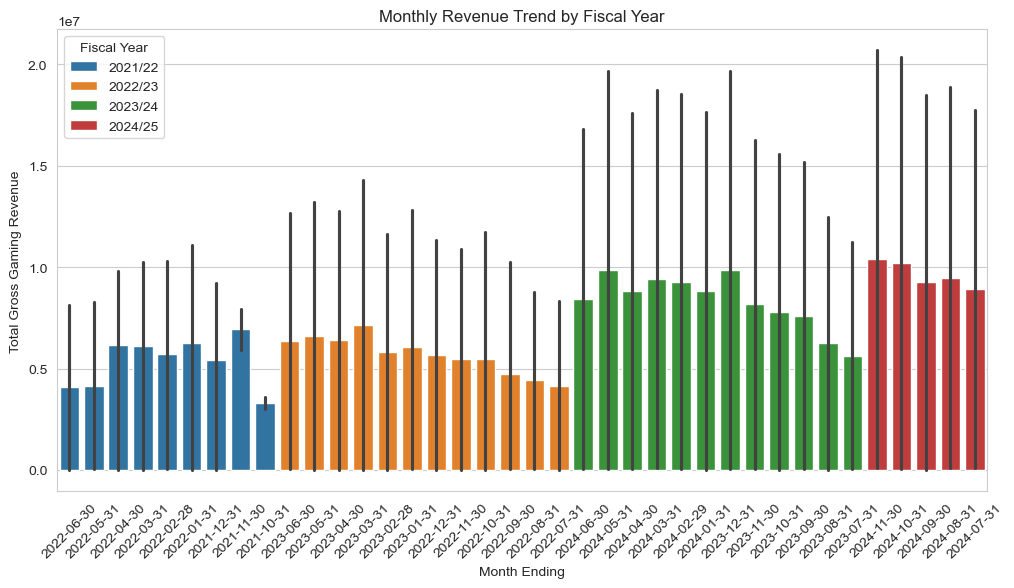

In [122]:
plt.figure(figsize=(12, 6))
sns.barplot(x="Month Ending", y="Total Gross Gaming Revenue", data=data, hue="Fiscal Year")
plt.xticks(rotation=45)
plt.title("Monthly Revenue Trend by Fiscal Year")
plt.show()

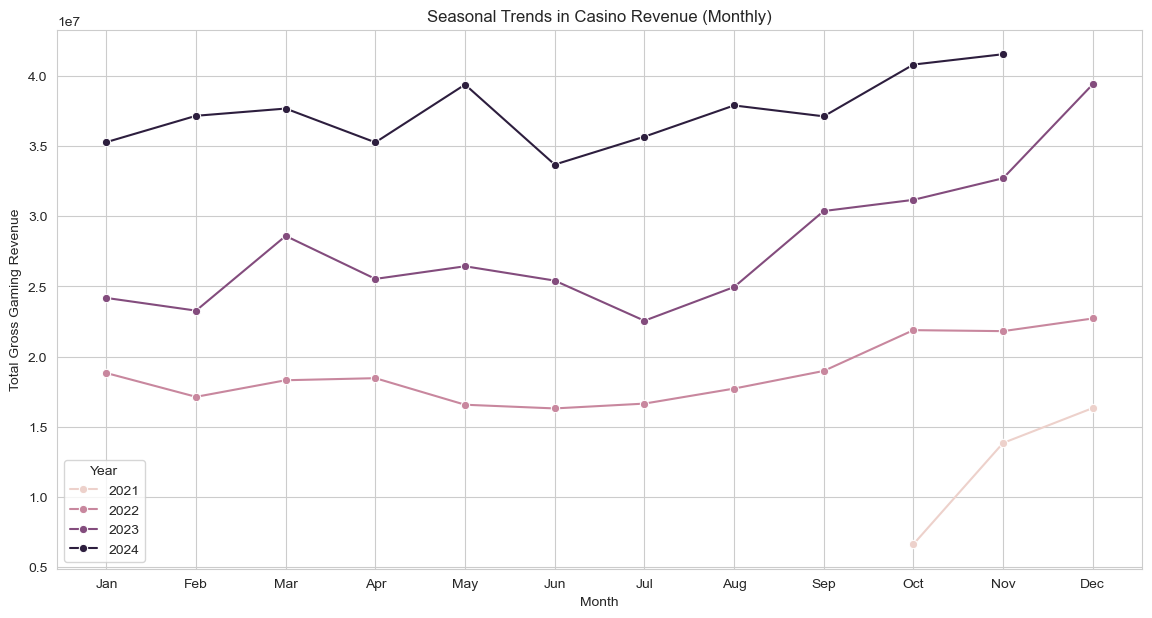

In [134]:

# Ensure columns have no leading/trailing whitespace
data.columns = data.columns.str.strip()

# Convert 'Month Ending' to datetime format
data['Month Ending'] = pd.to_datetime(data['Month Ending'], errors='coerce')

# Extract the month and year from 'Month Ending' for analysis
data['Month'] = data['Month Ending'].dt.month
data['Year'] = data['Month Ending'].dt.year

# Group by month and calculate the total revenue for each month
monthly_revenue = data.groupby(['Year', 'Month'])['Total Gross Gaming Revenue'].sum().reset_index()

# Plot total revenue by month to check for seasonality
plt.figure(figsize=(14, 7))
sns.lineplot(x='Month', y='Total Gross Gaming Revenue', data=monthly_revenue, hue='Year', marker='o')
plt.title('Seasonal Trends in Casino Revenue (Monthly)')
plt.xlabel('Month')
plt.ylabel('Total Gross Gaming Revenue')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Year')
plt.grid(True)
plt.show()


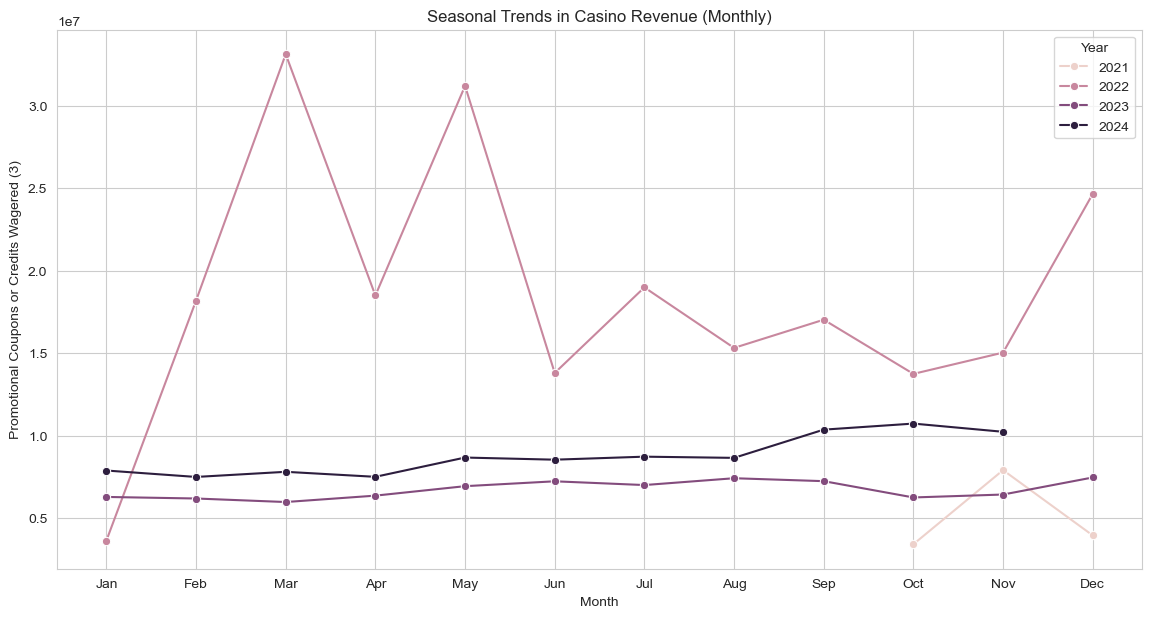

In [152]:

# Ensure columns have no leading/trailing whitespace
data.columns = data.columns.str.strip()

# Convert 'Month Ending' to datetime format
data['Month Ending'] = pd.to_datetime(data['Month Ending'], errors='coerce')

# Extract the month and year from 'Month Ending' for analysis
data['Month'] = data['Month Ending'].dt.month
data['Year'] = data['Month Ending'].dt.year

# Group by month and calculate the total revenue for each month
monthly_revenue = data.groupby(['Year', 'Month'])['Promotional Coupons or Credits Wagered (3)'].sum().reset_index()

# Plot total revenue by month to check for seasonality
plt.figure(figsize=(14, 7))
sns.lineplot(x='Month', y='Promotional Coupons or Credits Wagered (3)', data=monthly_revenue, hue='Year', marker='o')
plt.title('Seasonal Trends in Casino Revenue (Monthly)')
plt.xlabel('Month')
plt.ylabel('Promotional Coupons or Credits Wagered (3)')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Year')
plt.grid(True)
plt.show()


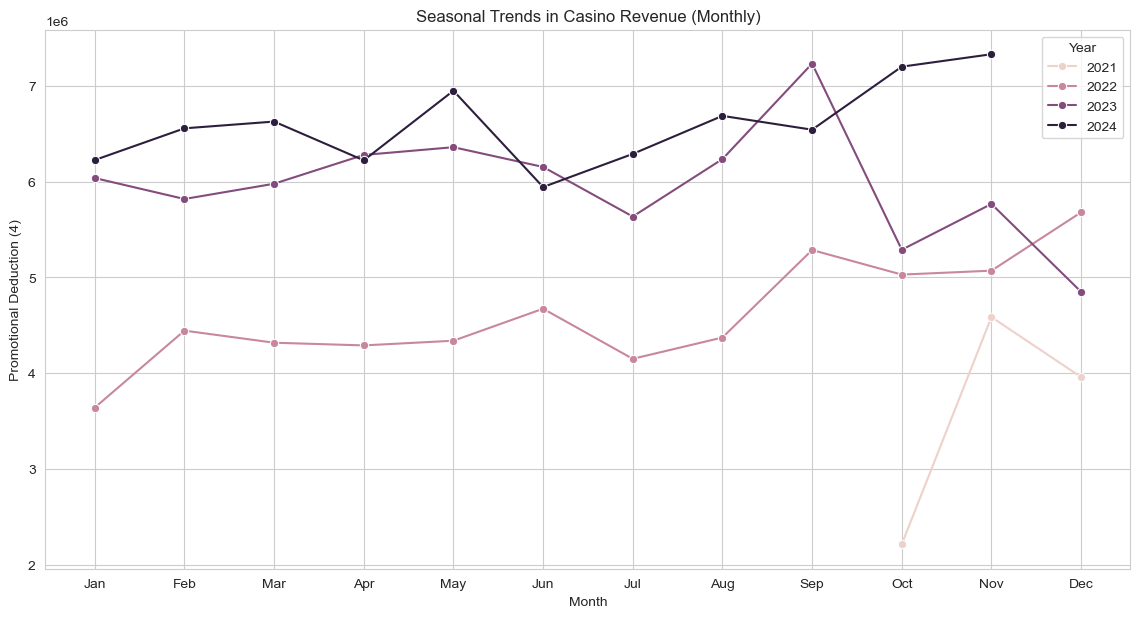

In [156]:

# Ensure columns have no leading/trailing whitespace
data.columns = data.columns.str.strip()

# Convert 'Month Ending' to datetime format
data['Month Ending'] = pd.to_datetime(data['Month Ending'], errors='coerce')

# Extract the month and year from 'Month Ending' for analysis
data['Month'] = data['Month Ending'].dt.month
data['Year'] = data['Month Ending'].dt.year

# Group by month and calculate the total revenue for each month
monthly_revenue = data.groupby(['Year', 'Month'])['Promotional Deduction (4)'].sum().reset_index()

# Plot total revenue by month to check for seasonality
plt.figure(figsize=(14, 7))
sns.lineplot(x='Month', y='Promotional Deduction (4)', data=monthly_revenue, hue='Year', marker='o')
plt.title('Seasonal Trends in Casino Revenue (Monthly)')
plt.xlabel('Month')
plt.ylabel('Promotional Deduction (4)')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Year')
plt.grid(True)
plt.show()


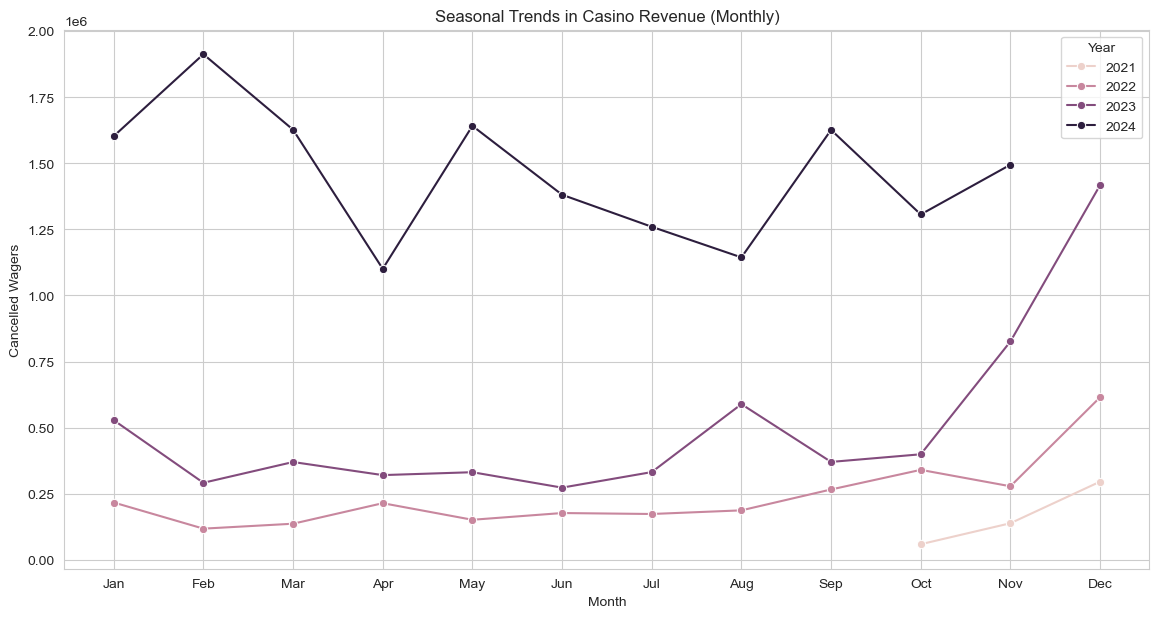

In [158]:

# Ensure columns have no leading/trailing whitespace
data.columns = data.columns.str.strip()

# Convert 'Month Ending' to datetime format
data['Month Ending'] = pd.to_datetime(data['Month Ending'], errors='coerce')

# Extract the month and year from 'Month Ending' for analysis
data['Month'] = data['Month Ending'].dt.month
data['Year'] = data['Month Ending'].dt.year

# Group by month and calculate the total revenue for each month
monthly_revenue = data.groupby(['Year', 'Month'])['Cancelled Wagers'].sum().reset_index()

# Plot total revenue by month to check for seasonality
plt.figure(figsize=(14, 7))
sns.lineplot(x='Month', y='Cancelled Wagers', data=monthly_revenue, hue='Year', marker='o')
plt.title('Seasonal Trends in Casino Revenue (Monthly)')
plt.xlabel('Month')
plt.ylabel('Cancelled Wagers')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Year')
plt.grid(True)
plt.show()


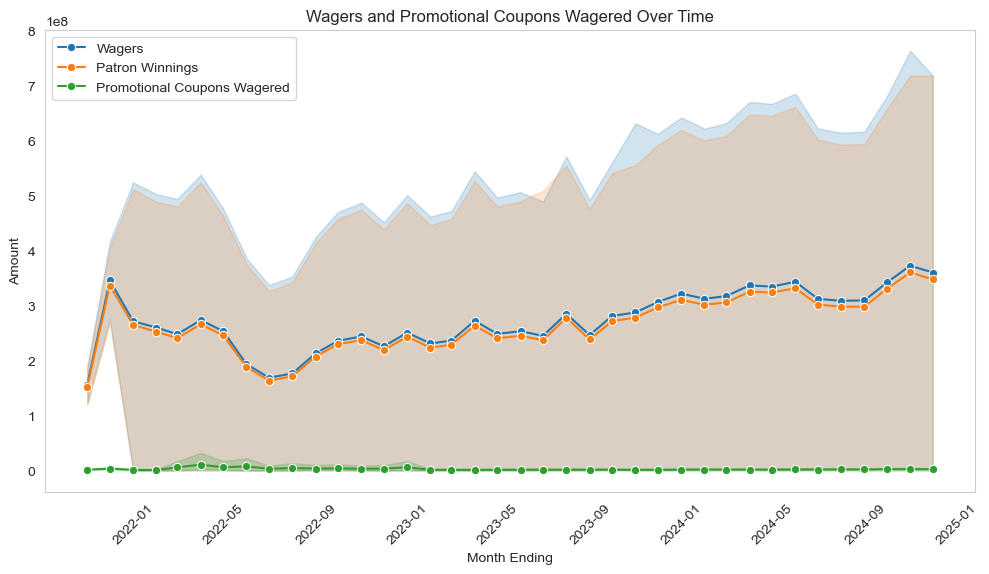

In [154]:
plt.figure(figsize=(12, 6))
sns.lineplot(x="Month Ending", y="Wagers", data=data, label="Wagers", marker="o")
sns.lineplot(x="Month Ending", y="Patron Winnings", data=data, label="Patron Winnings", marker="o")
sns.lineplot(x="Month Ending", y="Promotional Coupons or Credits Wagered (3)", data=data, label="Promotional Coupons Wagered", marker="o")
plt.title("Wagers and Promotional Coupons Wagered Over Time")
plt.xlabel("Month Ending")
plt.ylabel("Amount")
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()

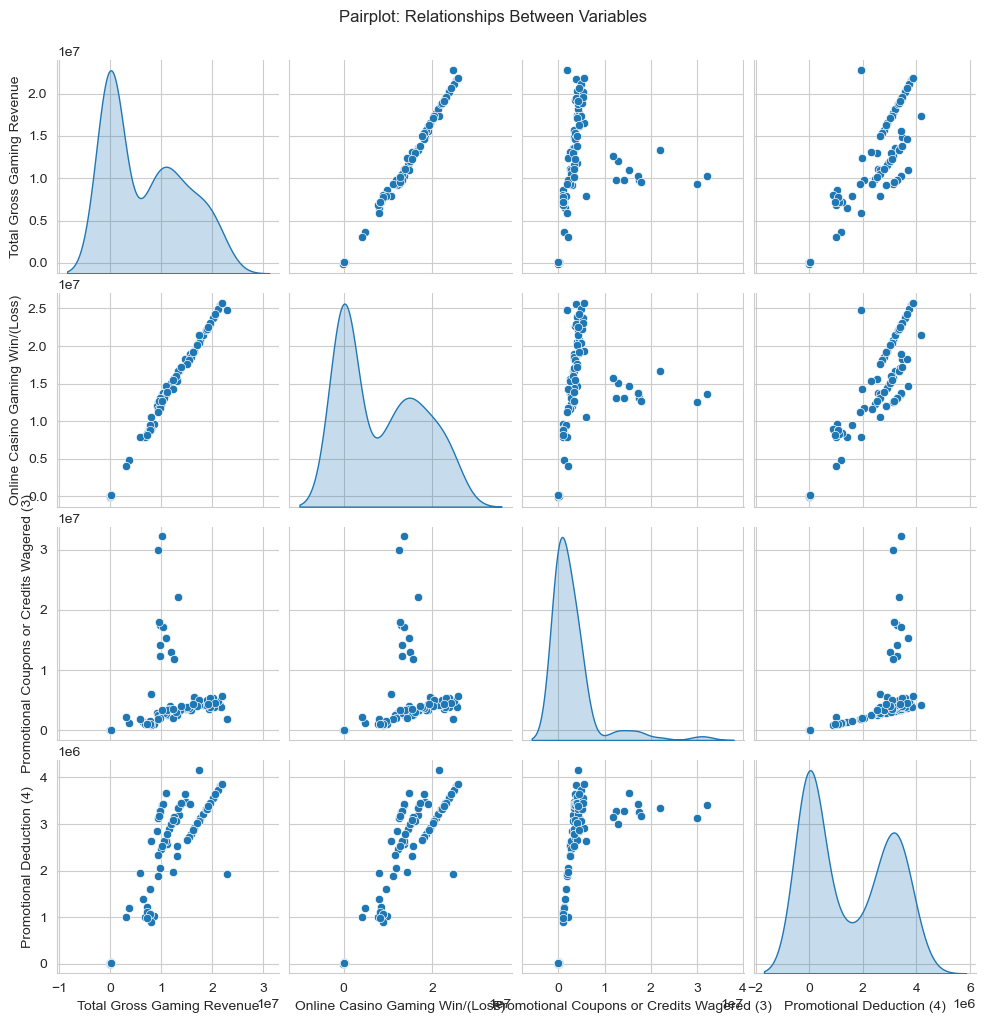

In [44]:
sns.pairplot(data[["Total Gross Gaming Revenue", 
                   "Online Casino Gaming Win/(Loss)", 
                   "Promotional Coupons or Credits Wagered (3)", 
                   "Promotional Deduction (4)"]], diag_kind="kde")
plt.suptitle("Pairplot: Relationships Between Variables", y=1.02)
plt.show()

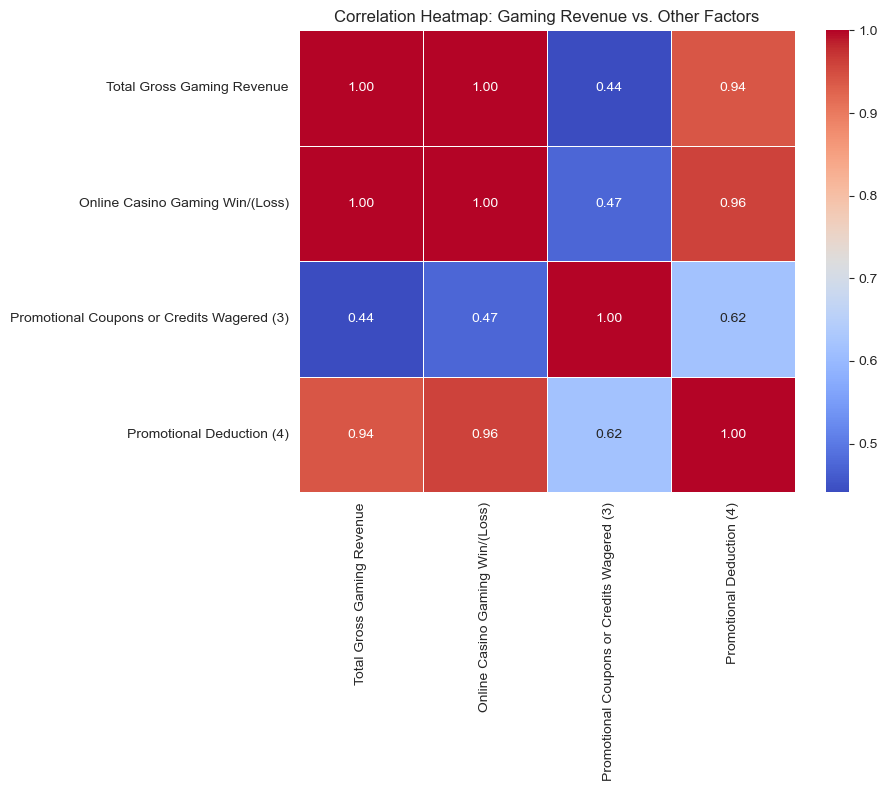

In [46]:
plt.figure(figsize=(8, 6))
sns.heatmap(data[["Total Gross Gaming Revenue", 
                  "Online Casino Gaming Win/(Loss)", 
                  "Promotional Coupons or Credits Wagered (3)", 
                  "Promotional Deduction (4)"]].corr(), 
            annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap: Gaming Revenue vs. Other Factors")
plt.show()

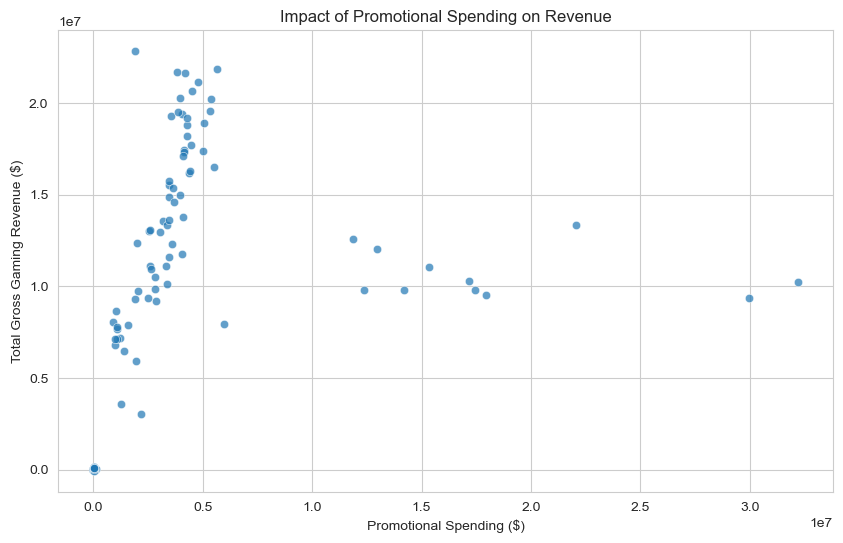

In [50]:
# Assuming 'Promotional Coupons or Credits Wagered (3)' impacts 'Total Gross Gaming Revenue'
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['Promotional Coupons or Credits Wagered (3)'], y=data['Total Gross Gaming Revenue'], alpha=0.7)
plt.xlabel('Promotional Spending ($)')
plt.ylabel('Total Gross Gaming Revenue ($)')
plt.title('Impact of Promotional Spending on Revenue')
plt.grid(True)
plt.show()

In [52]:
promotion_correlation = df[['Promotional Coupons or Credits Wagered (3)', 'Total Gross Gaming Revenue']].corr()
print("\nCorrelation between Promotional Spending and Revenue:")
print(promotion_correlation)


Correlation between Promotional Spending and Revenue:
                                            Promotional Coupons or Credits Wagered (3)  \
Promotional Coupons or Credits Wagered (3)                                    1.000000   
Total Gross Gaming Revenue                                                    0.440832   

                                            Total Gross Gaming Revenue  
Promotional Coupons or Credits Wagered (3)                    0.440832  
Total Gross Gaming Revenue                                    1.000000  


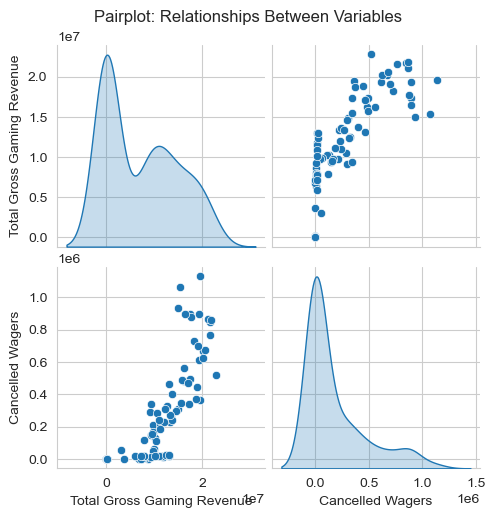

In [170]:
sns.pairplot(data[["Total Gross Gaming Revenue", 
                   "Cancelled Wagers"]], diag_kind="kde")
plt.suptitle("Pairplot: Relationships Between Variables", y=1.02)
plt.show()

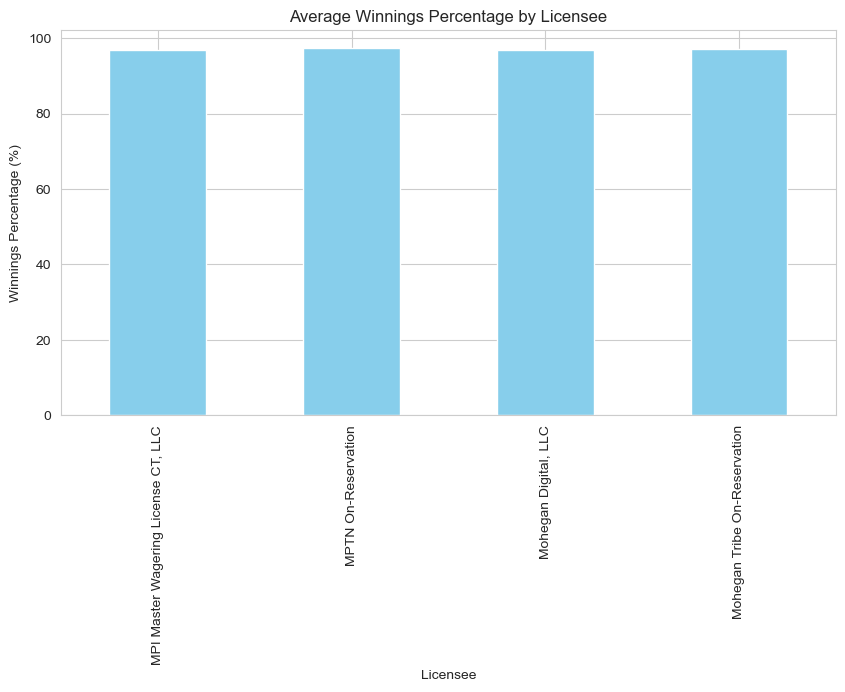

In [186]:
# Winnings Percentage Calculation
data['Winnings Percentage'] = (data['Patron Winnings'] / data['Wagers']) * 100

# Average winnings percentage by Licensee
winnings_percentage_analysis = data.groupby('Licensee')['Winnings Percentage'].mean()

# Plotting
plt.figure(figsize=(10, 5))
winnings_percentage_analysis.plot(kind='bar', color='skyblue')
plt.title("Average Winnings Percentage by Licensee")
plt.ylabel("Winnings Percentage (%)")
plt.show()